# Notebook for generating plots

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Optimal costs and routes

In [29]:
optimas = {
    'ch130': 6110,
    'ch150': 6528,
    'eil101': 629,
    'kroA100': 21282,
    'kroC100': 20749,
    'kroD100': 21294,
    'lin105': 14379,
    'pr76': 108159,
}

optimal_solutions = {
    'ch130': [1, 41, 39, 117, 112, 115, 28, 62, 105, 128, 16, 45, 5, 11, 76, 109, 61, 129, 124, 64, 69, 86, 88, 26, 7, 97, 70, 107, 127, 104, 43, 34, 17, 31, 
              27, 19, 100, 15, 29, 24, 116, 95, 79, 87, 12, 81, 103, 77, 94, 89, 110, 98, 68, 63, 48, 25, 113, 32, 36, 84, 119, 111, 123, 101, 82, 57, 9, 56, 
              65, 52, 75, 74, 99, 73, 92, 38, 106, 53, 120, 58, 49, 72, 91, 6, 102, 10, 14, 67, 13, 96, 122, 55, 60, 51, 42, 44, 93, 37, 22, 47, 40, 23, 33, 21, 
              126, 121, 78, 66, 85, 125, 90, 59, 30, 83, 3, 114, 108, 8, 18, 46, 80, 118, 20, 4, 35, 54, 2, 50, 130, 71],
    'ch150': [1, 98, 103, 82, 95, 107, 5, 100, 143, 97, 146, 26, 75, 18, 142, 85, 65, 132, 137, 50, 55, 58, 141, 83, 56, 90, 46, 92, 54, 138, 134, 131, 32, 23, 
              38, 67, 43, 109, 51, 20, 25, 110, 81, 29, 86, 135, 70, 108, 102, 114, 99, 19, 2, 37, 6, 28, 9, 42, 120, 47, 139, 40, 53, 118, 24, 12, 116, 101, 41, 
              57, 39, 127, 69, 36, 61, 11, 148, 130, 17, 66, 60, 140, 117, 129, 27, 31, 123, 74, 13, 106, 91, 119, 68, 128, 45, 71, 44, 64, 112, 136, 145, 144, 49, 
              147, 72, 80, 14, 122, 77, 133, 15, 78, 21, 150, 115, 4, 104, 22, 125, 149, 62, 3, 113, 10, 94, 88, 121, 79, 59, 16, 111, 105, 33, 126, 52, 93, 124, 35, 96, 89, 8, 7, 84, 30, 63, 48, 73, 76, 34, 87],
    'eil101': [1, 69, 27, 101, 53, 28, 26, 12, 80, 68, 29, 24, 54, 55, 25, 4, 39, 67, 23, 56, 75, 41, 22, 74, 72, 73, 21, 40, 58, 13, 94, 95, 97, 87, 2, 57, 15, 
               43, 42, 14, 44, 38, 86, 16, 61, 85, 91, 100, 98, 37, 92, 59, 93, 99, 96, 6, 89, 52, 18, 83, 60, 5, 84, 17, 45, 8, 46, 47, 36, 49, 64, 63, 90, 32, 
               10, 62, 11, 19, 48, 82, 7, 88, 31, 70, 30, 20, 66, 71, 65, 35, 34, 78, 81, 9, 51, 33, 79, 3, 77, 76, 50],
    'kroA100': [1, 47, 93, 28, 67, 58, 61, 51, 87, 25, 81, 69, 64, 40, 54, 2, 44, 50, 73, 68, 85, 82, 95, 13, 76, 33, 37, 5, 52, 78, 96, 39, 30, 48, 100, 41, 
                71, 14, 3, 43, 46, 29, 34, 83, 55, 7, 9, 57, 20, 12, 27, 86, 35, 62, 60, 77, 23, 98, 91, 45, 32, 11, 15, 17, 59, 74, 21, 72, 10, 84, 36, 99, 
                38, 24, 18, 79, 53, 88, 16, 94, 22, 70, 66, 26, 65, 4, 97, 56, 80, 31, 89, 42, 8, 92, 75, 19, 90, 49, 6, 63],
    'kroC100': [1, 85, 27, 15, 13, 79, 64, 20, 42, 55, 67, 47, 31, 65, 80, 77, 30, 68, 35, 2, 54, 6, 75, 22, 8, 17, 25, 90, 34, 58, 98, 88, 28, 39, 38, 71, 56, 
                43, 5, 86, 72, 83, 62, 50, 95, 94, 91, 76, 70, 23, 21, 89, 41, 59, 73, 3, 69, 60, 4, 93, 99, 19, 92, 10, 14, 36, 57, 74, 100, 33, 45, 81, 97, 96, 
                87, 52, 11, 84, 48, 66, 44, 63, 51, 16, 37, 9, 78, 82, 7, 26, 61, 32, 24, 46, 29, 18, 49, 12, 40, 53],
    'kroD100': [1, 50, 34, 81, 38, 66, 8, 52, 46, 23, 42, 89, 11, 90, 17, 94, 32, 97, 98, 49, 70, 22, 58, 29, 36, 67, 75, 7, 74, 61, 76, 80, 72, 57, 31, 78, 99, 
                45, 33, 68, 14, 65, 86, 96, 16, 63, 54, 91, 77, 43, 64, 85, 59, 3, 83, 40, 6, 18, 82, 25, 20, 9, 10, 21, 47, 12, 28, 56, 95, 26, 87, 55, 92, 48, 
                2, 100, 30, 35, 51, 19, 37, 62, 5, 53, 60, 44, 93, 4, 71, 39, 73, 15, 69, 84, 41, 24, 27, 88, 79, 13],
    'lin105': [1, 2, 6, 7, 10, 11, 15, 103, 21, 22, 29, 30, 31, 32, 33, 28, 23, 20, 12, 19, 24, 27, 16, 17, 18, 25, 26, 36, 37, 42, 41, 43, 46, 52, 53, 58, 57, 
               54, 51, 47, 44, 104, 40, 49, 45, 48, 50, 55, 56, 59, 105, 62, 63, 70, 69, 74, 75, 81, 73, 76, 80, 86, 79, 77, 72, 64, 67, 68, 71, 78, 82, 83, 84, 
               85, 91, 92, 96, 97, 101, 102, 93, 89, 90, 98, 99, 100, 95, 94, 88, 87, 66, 65, 61, 60, 39, 38, 35, 34, 14, 13, 4, 5, 9, 8, 3],
    'pr76': [1, 76, 75, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 74, 15, 16, 17, 18, 37, 36, 38, 39, 40, 34, 35, 33, 32, 29, 30, 31, 19, 20, 26, 27, 28, 
             43, 42, 54, 53, 52, 55, 56, 57, 58, 59, 60, 41, 61, 62, 63, 64, 73, 72, 71, 65, 66, 51, 49, 50, 67, 70, 68, 69, 47, 48, 44, 45, 46, 24, 25, 21, 22, 23],
}

In [30]:
# function to read the data from the file
def read_data(filename):
    # if odd line number, then it is a solution
    # if even line number, then it is a cost
    # skip the last line
    # on new line, append to the list
    
    with open(filename, 'r') as f:
        lines = f.readlines()
        lines = lines[:-1]
        solutions = []
        costs = []
        for i in range(len(lines)):
            if i % 2 == 0:
                #solutions.append(lines[i][:-1])
                solutions.append(list(map(int,lines[i][:-2].split(' '))))
            else:
                costs.append(float(lines[i][:-1]))
    return solutions, costs


#### Read solutions and costs

In [45]:
# ch130
random_ch130, random_ch130_costs = read_data('solution_random_ch130.txt')
random_walk_ch130, random_walk_ch130_costs = read_data('solution_random_walk_ch130.txt')
nn_ch130, nn_ch130_costs = read_data('solution_nn_ch130.txt')
greedy_ch130, greedy_ch130_costs = read_data('solution_greedy_ch130.txt')
steepest_ch130, steepest_ch130_costs = read_data('solution_steepest_ch130.txt')

In [47]:
# ch150
random_ch150, random_ch150_costs = read_data('solution_random_ch150.txt')
random_walk_ch150, random_walk_ch150_costs = read_data('solution_random_walk_ch150.txt')
nn_ch150, nn_ch150_costs = read_data('solution_nn_ch150.txt')
greedy_ch150, greedy_ch150_costs = read_data('solution_greedy_ch150.txt')
steepest_ch150, steepest_ch150_costs = read_data('solution_steepest_ch150.txt')

In [20]:
# eil101
random_eil101, random_eil101_costs = read_data('solution_random_eil101.txt')
random_walk_eil101, random_walk_eil101_costs = read_data('solution_random_walk_eil101.txt')
nn_eil101, nn_eil101_costs = read_data('solution_nn_eil101.txt')
greedy_eil101, greedy_eil101_costs = read_data('solution_greedy_eil101.txt')
steepest_eil101, steepest_eil101_costs = read_data('solution_steepest_eil101.txt')

In [27]:
# kroA100
random_kroA100, random_kroA100_costs = read_data('solution_random_kroA100.txt')
random_walk_kroA100, random_walk_kroA100_costs = read_data('solution_random_walk_kroA100.txt')
nn_kroA100, nn_kroA100_costs = read_data('solution_nn_kroA100.txt')
greedy_kroA100, greedy_kroA100_costs = read_data('solution_greedy_kroA100.txt')
steepest_kroA100, steepest_kroA100_costs = read_data('solution_steepest_kroA100.txt')

In [25]:
# kroC100
random_kroC100, random_kroC100_costs = read_data('solution_random_kroC100.txt')
random_walk_kroC100, random_walk_kroC100_costs = read_data('solution_random_walk_kroC100.txt')
nn_kroC100, nn_kroC100_costs = read_data('solution_nn_kroC100.txt')
greedy_kroC100, greedy_kroC100_costs = read_data('solution_greedy_kroC100.txt')
steepest_kroC100, steepest_kroC100_costs = read_data('solution_steepest_kroC100.txt')

In [31]:
# kroD100
random_kroD100, random_kroD100_costs = read_data('solution_random_kroD100.txt')
random_walk_kroD100, random_walk_kroD100_costs = read_data('solution_random_walk_kroD100.txt')
nn_kroD100, nn_kroD100_costs = read_data('solution_nn_kroD100.txt')
greedy_kroD100, greedy_kroD100_costs = read_data('solution_greedy_kroD100.txt')
steepest_kroD100, steepest_kroD100_costs = read_data('solution_steepest_kroD100.txt')

In [33]:
# lin105
random_lin105, random_lin105_costs = read_data('solution_random_lin105.txt')
random_walk_lin105, random_walk_lin105_costs = read_data('solution_random_walk_lin105.txt')
nn_lin105, nn_lin105_costs = read_data('solution_nn_lin105.txt')
greedy_lin105, greedy_lin105_costs = read_data('solution_greedy_lin105.txt')
steepest_lin105, steepest_lin105_costs = read_data('solution_steepest_lin105.txt')

In [32]:
# pr76
random_pr76, random_pr76_costs = read_data('solution_random_pr76.txt')
random_walk_pr76, random_walk_pr76_costs = read_data('solution_random_walk_pr76.txt')
nn_pr76, nn_pr76_costs = read_data('solution_nn_pr76.txt')
greedy_pr76, greedy_pr76_costs = read_data('solution_greedy_pr76.txt')
steepest_pr76, steepest_pr76_costs = read_data('solution_steepest_pr76.txt')

#### Quality

In [33]:
def get_quality(costs, optimas, instance):
    # get the quality of the solution (cost-optimal)/optimal
    # quality = 1 - cost
    quality = []
    for cost in costs:
        quality.append((cost-optimas[instance])/optimas[instance]) 
    return quality

Calculate qualities as (score - optimal_cost)/optimal_cost

In [ ]:
# ch130
random_ch130_quality = get_quality(random_ch130_costs, optimas, 'ch130')
random_walk_ch130_quality = get_quality(random_walk_ch130_costs, optimas, 'ch130')
nn_ch130_quality = get_quality(nn_ch130_costs, optimas, 'ch130')
greedy_ch130_quality = get_quality(greedy_ch130_costs, optimas, 'ch130')
steepest_ch130_quality = get_quality(steepest_ch130_costs, optimas, 'ch130')

In [ ]:
# ch150
random_ch150_quality = get_quality(random_ch150_costs, optimas, 'ch150')
random_walk_ch150_quality = get_quality(random_walk_ch150_costs, optimas, 'ch150')
nn_ch150_quality = get_quality(nn_ch150_costs, optimas, 'ch150')
greedy_ch150_quality = get_quality(greedy_ch150_costs, optimas, 'ch150')
steepest_ch150_quality = get_quality(steepest_ch150_costs, optimas, 'ch150')

In [ ]:
# eil101
random_eil101_quality = get_quality(random_eil101_costs, optimas, 'eil101')
random_walk_eil101_quality = get_quality(random_walk_eil101_costs, optimas, 'eil101')
nn_eil101_quality = get_quality(nn_eil101_costs, optimas, 'eil101')
greedy_eil101_quality = get_quality(greedy_eil101_costs, optimas, 'eil101')
steepest_eil101_quality = get_quality(steepest_eil101_costs, optimas, 'eil101')

In [ ]:
# kroA100
random_kroA100_quality = get_quality(random_kroA100_costs, optimas, 'kroA100')
random_walk_kroA100_quality = get_quality(random_walk_kroA100_costs, optimas, 'kroA100')
nn_kroA100_quality = get_quality(nn_kroA100_costs, optimas, 'kroA100')
greedy_kroA100_quality = get_quality(greedy_kroA100_costs, optimas, 'kroA100')
steepest_kroA100_quality = get_quality(steepest_kroA100_costs, optimas, 'kroA100')

In [ ]:
# kroC100
random_kroC100_quality = get_quality(random_kroC100_costs, optimas, 'kroC100')
random_walk_kroC100_quality = get_quality(random_walk_kroC100_costs, optimas, 'kroC100')
nn_kroC100_quality = get_quality(nn_kroC100_costs, optimas, 'kroC100')
greedy_kroC100_quality = get_quality(greedy_kroC100_costs, optimas, 'kroC100')
steepest_kroC100_quality = get_quality(steepest_kroC100_costs, optimas, 'kroC100')

In [ ]:
# kroD100
random_kroD100_quality = get_quality(random_kroD100_costs, optimas, 'kroD100')
random_walk_kroD100_quality = get_quality(random_walk_kroD100_costs, optimas, 'kroD100')
nn_kroD100_quality = get_quality(nn_kroD100_costs, optimas, 'kroD100')
greedy_kroD100_quality = get_quality(greedy_kroD100_costs, optimas, 'kroD100')
steepest_kroD100_quality = get_quality(steepest_kroD100_costs, optimas, 'kroD100')

In [ ]:
# lin105
random_lin105_quality = get_quality(random_lin105_costs, optimas, 'lin105')
random_walk_lin105_quality = get_quality(random_walk_lin105_costs, optimas, 'lin105')
nn_lin105_quality = get_quality(nn_lin105_costs, optimas, 'lin105')
greedy_lin105_quality = get_quality(greedy_lin105_costs, optimas, 'lin105')
steepest_lin105_quality = get_quality(steepest_lin105_costs, optimas, 'lin105')

In [34]:
# pr76
random_pr76_quality = get_quality(random_pr76_costs, optimas, 'pr76')
random_walk_pr76_quality = get_quality(random_walk_pr76_costs, optimas, 'pr76')
nn_pr76_quality = get_quality(nn_pr76_costs, optimas, 'pr76')
greedy_pr76_quality = get_quality(greedy_pr76_costs, optimas, 'pr76')
steepest_pr76_quality = get_quality(steepest_pr76_costs, optimas, 'pr76')

In [23]:
def create_boxplot_instance(data, instance, xlabel='Algorithms', ylabel='Quality', title="Quality of solutions for"):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_title(title+" "+instance)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.boxplot(data, labels=['random', 'rw', 'nn', 'greedy', 'steepest'])
    plt.show()

In [42]:
def create_boxplot_algorithm(data, algorithm, xlabel='Instances', ylabel='Quality', title="Quality of solutions for", labels=['pr76']):#labels=['ch130', 'ch150', 'eil101', 'kroA100', 'kroC100', 'kroD100', 'lin105', 'pr76']):
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    plt.title(title+" "+algorithm)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # calculate min, max, avg, std for each instance
    stats = {}
    for name, values in zip(labels, data):
        stats[name] = {
            'min': np.min(values),
            'max': np.max(values),
            'avg': np.mean(values),
            'std': np.std(values),
        }

    # plot results
    names = labels
    min_values = [stats[name]['min'] for name in names]
    max_values = [stats[name]['max'] for name in names]
    avg_values = [stats[name]['avg'] for name in names]
    std_values = [stats[name]['std'] for name in names]

    fig, ax = plt.subplots()
    # plot min and max values
    ax.plot(names, min_values, '.', label='min')
    ax.plot(names, max_values, '.', label='max')
    # plot avg and std values in a form of error bars
    ax.errorbar(names, avg_values, yerr=std_values, capsize=3, fmt='o', label='avg +- std')
    ax.legend()
    plt.xticks(rotation=90)
    plt.show()

Get qualities from every instance for each algorithm

In [43]:
random_qualities = [random_pr76_quality]#[random_ch130_quality, random_ch150_quality, random_eil101_quality, random_kroA100_quality, random_kroC100_quality, random_kroD100_quality, random_lin105_quality, random_pr76_quality]
#random_walk_qualities = [random_walk_ch130_quality, random_walk_ch150_quality, random_walk_eil101_quality, random_walk_kroA100_quality, random_walk_kroC100_quality, random_walk_kroD100_quality, random_walk_lin105_quality, random_walk_pr76_quality]
#nn_qualities = [nn_ch130_quality, nn_ch150_quality, nn_eil101_quality, nn_kroA100_quality, nn_kroC100_quality, nn_kroD100_quality, nn_lin105_quality, nn_pr76_quality]
#greedy_qualities = [greedy_ch130_quality, greedy_ch150_quality, greedy_eil101_quality, greedy_kroA100_quality, greedy_kroC100_quality, greedy_kroD100_quality, greedy_lin105_quality, greedy_pr76_quality]
#steepest_qualities = [steepest_ch130_quality, steepest_ch150_quality, steepest_eil101_quality, steepest_kroA100_quality, steepest_kroC100_quality, steepest_kroD100_quality, steepest_lin105_quality, steepest_pr76_quality]

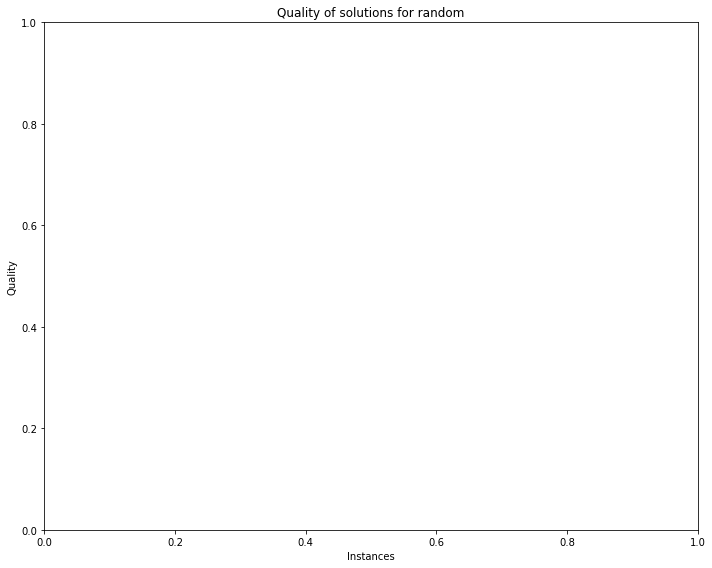

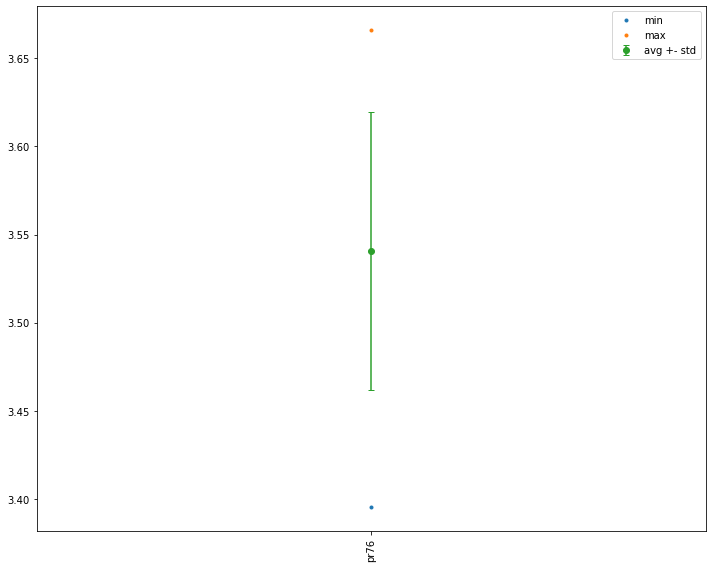

In [45]:
create_boxplot_algorithm(random_qualities, 'random')

#### Running time

In [ ]:
def create_boxplot_running_time(data, algorithm, xlabel='Instances', ylabel='Running time [ns]', title="Running time for", labels=['ch130', 'ch150', 'eil101', 'kroA100', 'kroC100', 'kroD100', 'lin105', 'pr76']):
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    plt.title(title+" "+algorithm)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # calculate min, max, avg, std for each instance
    stats = {}
    for name, values in zip(labels, data):
        stats[name] = {
            'min': np.min(values),
            'max': np.max(values),
            'avg': np.mean(values),
            'std': np.std(values),
        }

    # plot results
    names = list(data.keys())
    min_values = [stats[name]['min'] for name in names]
    max_values = [stats[name]['max'] for name in names]
    avg_values = [stats[name]['avg'] for name in names]
    std_values = [stats[name]['std'] for name in names]

    fig, ax = plt.subplots()
    # plot min and max values
    ax.plot(names, min_values, '.', label='min')
    ax.plot(names, max_values, '.', label='max')
    # plot avg and std values in a form of error bars
    ax.errorbar(names, avg_values, yerr=std_values, capsize=3, fmt='o', label='avg +- std')
    ax.legend()
    plt.xticks(rotation=90)
    plt.show()

#### Efficiency

#### Average number of steps (greedy, steepest)

In [48]:
def create_scatter_plot_steps_number(data, algorithm, xlabel='Instances', ylabel='Steps', title="Number of steps for", labels=['ch130', 'ch150', 'eil101', 'kroA100', 'kroC100', 'kroD100', 'lin105', 'pr76']):
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    plt.title(title+" "+algorithm)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(labels, data[0], s=10, c='b', marker="o", label='greedy')
    plt.scatter(labels, data[1], s=10, c='r', marker="o", label='steepest')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

#### Average number of evaluated solutions (random, random walk, greedy, steepest)

In [ ]:
def create_scatter_plot_evaluated_solutions_number(data, algorithm, xlabel='Instances', ylabel='Evaluated solutions', title="Number of evaluated solutions for", labels=['ch130', 'ch150', 'eil101', 'kroA100', 'kroC100', 'kroD100', 'lin105', 'pr76']):
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    plt.title(title+" "+algorithm)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(labels, data[0], s=10, c='w', marker="o", label='random')
    plt.scatter(labels, data[1], s=10, c='w', marker="o", label='random_walk')
    plt.scatter(labels, data[2], s=10, c='b', marker="o", label='greedy')
    plt.scatter(labels, data[3], s=10, c='r', marker="o", label='steepest')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

---

#### Initial vs final quality (greedy, steepest)

In [24]:
from numpy.polynomial.polynomial import polyfit

def create_scatter_plot_initial_final(data, algorithm, xlabel='Initial costs', ylabel='Final costs', title="Initial vs final costs for"):
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    plt.title(title+" "+algorithm)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    x = np.array(data[0])
    y = np.array(data[1])
    b, m = polyfit(x, y, 1)
    plt.plot(x, y, '.')
    plt.plot(x, b + m * x, '-', alpha=0.5)
    plt.show()

#### Number of restarts vs average and best solution

In [26]:
def create_scatter_plot_restart_vs_score(data, algorithm, xlabel='Number of restarts', ylabel='Best cost found', title="Number of restarts vs best cost found for"):
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True
    plt.title(title+" "+algorithm)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    x = np.array(data[0])
    y = np.array(data[1])
    window = 5
    average_y = []
    for ind in range(len(y) - window + 1):
        average_y.append(np.mean(y[ind:ind+window]))
    for ind in range(window - 1):
        average_y.insert(0, np.nan)
    # b, m = polyfit(x, y, 1)
    plt.plot(x, y, 'k.-', label='Original data')
    plt.plot(x, average_y, 'r.-', label='Running average')
    # plt.plot(x, y, '.')
    # plt.plot(x, b + m * x, '-', alpha=0.5)
    plt.show()